Filipe Pierri de Mendonça Nobre - 118033026

In [1]:
using Plots

# 2.   Método de Newton

Primeiramente, para fazermos as questões abaixo, precisaremos de uma implementação do Método de Newton. O código abaixo foi feito com base no vídeo do Abel sobre Zeros de Funções (https://www.youtube.com/watch?v=QI8mqz8FZEo&list=PLOOY0eChA1uyO7qjoupZ3979741csLLTE&index=6 - 1:11:26) (enviei este mesmo vídeo para Thales Macena e Daniel Rodrigues e discutimos sobre a 2.1).

In [7]:
function newton(f, df, x)
    
    fx = f(x)
    
    # Determinam o erro máximo da aproximação, o tempo máximo do programa executando e num máximo de iterações
    tempo_max = 25
    iteracoes_max = 500
    difmax = 10^(-14)
    
    # Checa se f(x) já está dentro da diferença esperada da aproximação
    if abs(fx) <= difmax
        return x, fx, :validado
    end
    
    k = 0
    t0 = time()
    dt = time() - t0 #calcular o tempo de execucao
    
    exitflag = :inconclusivo
    res = (abs(fx) <= difmax) # Se a aproximação já estiver nos conformes, marca res como true
    tempo_esgotado = (k >= iteracoes_max || dt >= tempo_max) #Checa se atingiu o limite de tempo ou iterações
    
    while !(res || tempo_esgotado)
        dfx = df(x) # Derivada
        
        if abs(dfx) <= difmax # Verifica se a derivada é nula
            exitflag = :derivada_nula
            break 
        end
        
        println("x: ", x, " f(x): ", fx)
        
        x = x - fx / dfx # Método de Newton
        fx = f(x)
        
        
        k += 1 # Iterações
        dt = time() - t0 # Tempo
        res = (abs(fx) <= difmax)
        tempo_esgotado = (k >= iteracoes_max || dt >= tempo_max)
        if tempo_esgotado
            exitflag = :tempo_esgotado
        end
        
    end
    
    if res
        exitflag = :validado
    end
    
    println("Número de iterações: ", k)
    return x, fx, exitflag
    
end

newton (generic function with 1 method)

### 2.1

Para aproximarmos $\sqrt[3]{43}$ com o Método de Newton-Raphson, é bem simples. Nós utilizamos o Método de Newton para encontrarmos aproximar raízes de funções, onde iteramos diversas vezes $x(k+1) = x(k) - \frac{f(x(k))}{f'(x(k))}$ até achar um zero de uma função diferenciável $f(x)$. Neste caso, precisamos aplicar o método na função $f(x) = x^{{3}} - 43$ (afinal, se a ideia é não calcularmos diretamente a raiz cúbica de 43 na função, nos resta elevar $x$ à terceira potência e subtrair $43$ do resultado, assim encontraremos um x que será muito próximo de $\sqrt[3]{43}$ quando ocorrer a última iteração, pois a diferença será muito próxima de zero).

In [25]:
# Teste básico com a função x² - 2 no ponto x = 1

f(x) = ((x) ^ (3)) - 43
df(x) = 3 * (x^(2))

df (generic function with 1 method)

Por escolhermos tal função, um chute inicial problemático seria 0, pois a derivada seria nula na primeira iteração. Escolherei 3.5 como chute inicial, pois sabemos que a raiz cúbica de 43 tem de estar entre 3 e 4. Abaixo, vemos que a compilação com chhute inicial $x = 0$ não ocorreu da forma ideal:

In [18]:
newton(f, df, 0)

Número de iterações: 0


(0, -43, :derivada_nula)

Com chute inicial $x=3$, obtivemos uma resposta bem próxima do que buscávamos:

In [26]:
newton(f, df, 3.5)

x: 3.5 f(x): -0.125
x: 3.503401360544218 f(x): 0.00012151651350222892
x: 3.503398060389833 f(x): 1.1446843473095214e-10
Número de iterações: 3


(3.5033980603867243, 7.105427357601002e-15, :validado)

### 2.2

Olhemos atentamente em como funciona o Método de Newton-Raphson: 
$$x(k+1) = x(k) - \frac{f(x(k))}{f'(x(k))}$$

Nós queremos uma $f(x)$ de grau 2, ou seja, $f(x) = ax² + bx + c$, que quando $x(k)=1 → x(k+1)=2$ e quando $x(k)=2 → x(k+1)=1$, fazendo essa alternância. Vamos fazer as devidas substituições em x na expressão para obtermos os resultados, começando com $x(k)=1 → x(k+1)=2$:

$$1 = 2 - \frac{4a+2b+c}{4a + b}$$
$$1 = \frac{4a+2b+c}{4a + b}$$
$$4a + b = 4a + 2b + c$$
$$-b - c = 0$$
$$-b = c$$

Agora iremos fazer as substituições quando $x(k)=2 → x(k+1)=1$:

$$2 = 1 - \frac{a+b+c}{2a + b}$$
$$1 = -\frac{a+b+c}{2a + b}$$
$$2a + b = -a - b - c$$
$$3a = - 2b - c$$
$$a = \frac{-2b-c}{3}$$

Juntando com o que obtivemos na expressão anterior, teremos:

$$a = \frac{-2b-c}{3}$$
$$-b = c$$

$$↓↓↓↓↓$$

$$a = \frac{2c-c}{3}$$
$$a = \frac{c}{3}$$

Perceba que existem infinitas soluções para esse problema, desde que respeitemos as relações encontradas.

Escolhi como solução para este problema a função:
 $$f(x) = {x²} -3x + 3$$

# Método de Taylor

### 4.1

Queremos provar que, se $a \approx x$, então $ \frac {f(x)-f(a)}{x-a} \approx f´(a)$. Ele quer que nós calculemos o erro (ou teto) dessa aproximação usando Taylor de Ordem 1. Ou seja, precisamos manipular algebricamente o Taylor de Ordem 1 para chegarmos no erro que estamos buscando na equacão $ f´(a) - \frac {f(x)-f(a)}{x-a} \leq Teto $:

$$f(x) - (f(a) + f´(a)(x-a)) \leq \frac{M(x-a)^2}{2}$$

1.Tiramos os parênteses

$$f(x) - f(a) - f´(a)(x-a) \leq \frac{M(x-a)^2}{2}$$

2.Multiplicamos por -1

$$f´(a)(x-a) - (f(x) - f(a)) \leq \frac{-M(x-a)^2}{2}$$

3.Dividimos por (x-a)

$$f´(a) - \frac{(f(x) - f(a))}{x-a} \leq \frac{-M(x-a)}{2}$$

E voalait!


### 4.2

Para conseguirmos aproximar $sen(0.01)$ com erro menor que $10^{-6}$ por meio do Método de Taylor, precisamos que a "cota superior do erro" (a parte com o M) seja menor que $10^{-6}$. Implementaremos primeiro uma função para calcular essa cota e determinarmos a ordem do Polinômio de Taylor que precisaremos calcular.

In [1]:
function taylorM(x, a, m, min)
    i=1
    erro=(m*(x-a))/i
    while (erro > min)
        i= i+1
        erro = erro*((x-a)/i)
    end
    println("Ordem: ", i-1)
    return erro
end

taylorM (generic function with 1 method)

Escolhi $a=0$ pois é muito próximo de $0.01$, e sabemos de cabeça o seno e cosseno de $0$ (fora facilitar nossas contas). O M deve ser 1 pois é o valor máximo que um seno ou cosseno pode atingir.

In [2]:
taylorM(0.01, 0, 1, 10^(-6))

Ordem: 2


1.6666666666666668e-7

Como $Pn(x)$ é maior que $f(x)$ (afinal, é um módulo a subtração), devemos subtrair a margem de erro de $Pn(x)$ para encontrar um valor aproximado de $f(x)$

In [48]:
(((0.01-0)^2)*((-sin(0))/(2))+(0.01-0)*cos(0)+sin(0)) - 1.6666666666666668e-7

0.009999833333333333

Ao compararmos com o valor com a função sin para 0.01, vemos que o erro foi realmente menor que $10^{-6}$

In [28]:
sin(0.01)

0.009999833334166664

### 4.3

Apenas dizer "pois o quão mais próximo de zero é o x, o valor de seu seno é praticamente o valor de x" não é o tipo de resposta que nós, como alunos de Cálculo Numérico, buscamos dar em nossas respostas. Felizmente, o Método de Taylor nos ajuda a compreender o que ocorre, e temos o exemplo da questão anterior para nos ajudar. Quando o valor de x é muito próximo de 0, devemos utilizar $a=0$ e $M=1$, pelos motivos já especificados na questão anterior. O que ocorre é que o quão maior for a ordem do Polinômio de Taylor, cada vez mais a "cota superior do erro" tenderá a zero, possuindo valores ridiculamente baixos. Em contrapartida, o valor do $Pn(x)$ dá um valor igual ou muito próximo do valor de x, e algo importante a ressaltar é que todos os termos do polinômio que possuem seno acabam sendo zerados. Se $Pn(x) \approx x$ e $f(x) - Pn(x) \approx 0$, conseguimos concluir que $f(x) \approx Pn(x) \approx x \approx sin(x)$. É bom sabermos o quão bom é utilizar o Teorema de Taylor para aproximar senos próximos de zero!

### 4.4


Primeiramente, iremos só calcular a aproximação em Taylor de ordem 3. Ou seja, $f(a) + f'(a)(x-a)+ f''(a)/2 * (x-a)^2 + f'''(a)/6 + (x-a)^3$. Ele nos pede para utilizar $a=1$ e o nosso $x$ é igual a $1.5$

In [6]:
0 + (0.5 * 1) + ((-1/2) * (0.5 ^ 2)) + ((2/6) * (0.5 ^ 3))

0.4166666666666667

Beleza, mas o que conseguimos com isso? Temos uma aproximação, mas como saberemos o erro em relação ao $f(1.5)$ sem poder utilizar a função $log(1.5)$? Bom, se o Taylor é de ordem 3, podemos estipular o valor de M graças a uma relação muito bacana: $f^{n+1}(x) \leq M$. Sabemos que $ln''''(x) = -6/x^4$, e como utilizamos o módulo, com $a=1$, seguramente podemos afirmar que o $M$ não poderá ultrapassar o valor $6$. Assim, iremos calcular o lado do M da desigualdade com M=6, e assim descobrir o número de casas que estão iguais.

In [5]:
function taylorM2(x, a, m, order)
  i=1
  erro=(m*(x-a))/i
  while (i < (order+1))
      i= i+1
      erro = erro*((x-a)/i)
  end
  println("Ordem: ", i-1)
  return erro
end

taylorM2 (generic function with 1 method)

In [13]:
taylorM2(1.5, 1, 6, 3)

Ordem: 3


0.015625

Vemos que acertamos apenas dois dígitos com Taylor de Ordem 3. Agora que chegamos na última pergunta da questão, devo dizer que ela é mais complicadinha. O motivo é o seguinte: com a relação $f^{n+1}(x) \leq M$, não podemos simplesmente utilizar $M=6$. Terei de atualizar o M também a cada iteração para que tenhamos um resultado correto. Mas consegui, então para que tenhamos um erro menor que $10^{-8}$, a ordem de Taylor deve ser...

In [11]:
function taylorM3(x, a, min)
  i=1
  m=1/a #valor absoluto
  erro=(m*(x-a))/i
  while (erro > min)
      i= i+1
      erro = erro*((x-a)/i)*((i-1)/a)
  end
  println("Ordem: ", i-1)
  return erro
end

taylorM3 (generic function with 1 method)

In [12]:
taylorM3(1.5, 1, 10^(-8))

Ordem: 22

5.183012589164403e-9

SIM. 22. Ainda bem que automatizamos o cálculo, pois imagine fazer essa conta na mão...

### 4.5

### 4.6

Com o Teorema de Taylor, podemos obter o polinômio de Taylor para o seno, e assim podemos nos poupar de utilizar a série de L'Hospital. Assim sendo:

Este é o limite que nós temos:

$$\lim _{x\to 0}\left(\frac{\left(sin\left(x\right)-x\right)}{x^3}\right)$$

Agora substituímos o seno pelo polinômio de Taylor, que facilitará nossas contas:

$$\lim _{x\to 0}\left(\frac{\left(x - (\frac{x^3}{3!}) + (\frac{x^5}{5!}) ...-x\right)}{x^3}\right)$$

Está vendo que trouxemos um $x$ como primeiro termo do polinômio? Iremos agora subtraílo com o x que tínhhamos já na expressão:

$$\lim _{x\to 0}\left(\frac{\frac{-x^3}{3!} + \frac{x^5}{5!} ...}{x^3}\right)$$

Agora iremos dividir todos os termos por $x^3$, e assim remover o denominador ali de baixo $x^3$:

$$\lim _{x\to 0}\left(\frac{-1}{3!} + \frac{x^2}{5!} +...\right)$$

Finalmente, podemos agora aplicar o limite de $x\to 0$ e nos livrar de todas as expressões com x:

$$\frac{-1}{3!}$$

Calculando $3!$, temos o limite da questão:

$$\frac{-1}{6}$$

### 4.7

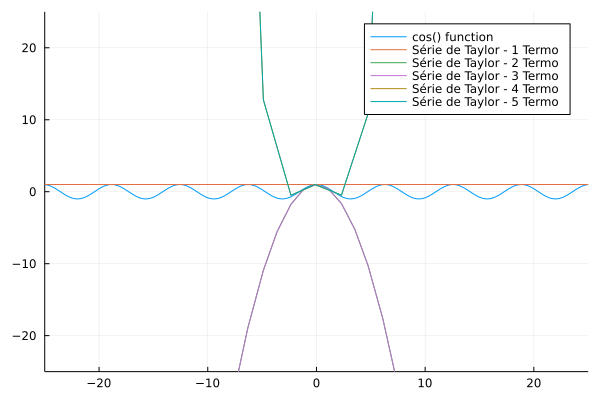

In [3]:
f1(x) = cos(x)
f2(x) = cos(0) -sin(0)*(x-0)
f3(x) = cos(0) -sin(0)*(x-0) - ((cos(0)*(x-0)^2)/2)
f4(x) = cos(0) -sin(0)*(x-0) - ((cos(0)*(x-0)^2)/2) + ((sin(0)*(x-0)^3)/6)
f5(x) = cos(0) -sin(0)*(x-0) - ((cos(0)*(x-0)^2)/2) + ((sin(0)*(x-0)^3)/6) + ((cos(0)*(x-0)^4)/24)
f6(x) = cos(0) -sin(0)*(x-0) - ((cos(0)*(x-0)^2)/2) + ((sin(0)*(x-0)^3)/6) + ((cos(0)*(x-0)^4)/24) - ((sin(0)*(x-0)^5)/120)

plot(f1, xlim=(-25,25), ylim=(-25,25), label = "cos() function")
plot!(f2, label = "Série de Taylor - 1 Termo")
plot!(f3, label = "Série de Taylor - 2 Termo")
plot!(f4, label = "Série de Taylor - 3 Termo")
plot!(f5, label = "Série de Taylor - 4 Termo")
plot!(f6, label = "Série de Taylor - 5 Termo")